<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание" data-toc-modified-id="Задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание</a></span></li><li><span><a href="#Задание" data-toc-modified-id="Задание-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задание</a></span></li><li><span><a href="#Задание" data-toc-modified-id="Задание-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задание</a></span></li><li><span><a href="#Задание" data-toc-modified-id="Задание-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Задание</a></span></li><li><span><a href="#Задание" data-toc-modified-id="Задание-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Задание</a></span></li></ul></div>

In [7]:
import scipy 
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import linalg
from scipy.optimize import curve_fit
from scipy.spatial.distance import pdist
from scipy.misc import derivative
from heapq import nsmallest
from scipy.stats import logser

%matplotlib inline

## Задание 

Найти наиболее похожего пользователя по косинусной метрике ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).
Сжать признаковые описания пользователя с 15 фильмов до 5-ти признаков

In [3]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [40]:
def nearest_user(matrix):
    nearest_dict = {}
    second_smallest = lambda numbers: nsmallest(2, numbers)[-1]
    for i in range(0, len(raitings)):
        dists = []
        for row in raitings:
            dists.append(scipy.spatial.distance.cosine(raitings[i,:], row))
            nearest_dict[i] = dists.index(second_smallest(dists))
    return nearest_dict

In [41]:
# я решил что пары логичнее всего возвращать в виде словаря
nearest_user(raitings)

{0: 8, 1: 4, 2: 9, 3: 9, 4: 8, 5: 9, 6: 3, 7: 5, 8: 0, 9: 2}

Теперь сожмем матрицу до 5

In [52]:
X_true = raitings
pca = PCA(n_components=5)
pca.fit(X_true) 
X_pca = pca.transform(X_true)
X_pca

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

In [53]:
nearest_user(X_pca)

{0: 8, 1: 4, 2: 9, 3: 9, 4: 8, 5: 9, 6: 3, 7: 5, 8: 0, 9: 2}

In [54]:
nearest_user(raitings) == nearest_user(X_pca)

True

**потрясающе, мы ужали матрицу и при этом ничего не потеряли!**  
Хотя тип int изначальный и превратился во float

## Задание 

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ 

Издеваться над собой и считать что-то на бумаге скучно, если есть sympy!

In [57]:
x = sym.var('x')
df = sym.diff((sym.tan(sym.sin(x))**2+sym.cos(2*x + 3)),x)
df

2*(tan(sin(x))**2 + 1)*cos(x)*tan(sin(x)) - 2*sin(2*x + 3)

In [58]:
df.subs(x,1)

-2*sin(5) + 2*(1 + tan(sin(1))**2)*cos(1)*tan(sin(1))

In [61]:
df.subs(x,1).evalf()

4.64084346529635

Ок, для сравнения воспользуемся численными методами

In [67]:
def f(x):
    return np.tan(np.sin(x))**2+np.cos(2*x + 3)

derivative(f, 1.0, dx=1e-5)

4.640843464953637

In [68]:
print(abs((df.subs(x,1).evalf())-(derivative(f, 1.0, dx=1e-5))))

3.42715189560749e-10


## Задание 



Дана функция с неизвестными параметрами a и b, вам также известны значения функции f(x) в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.


In [2]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [3]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [4]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

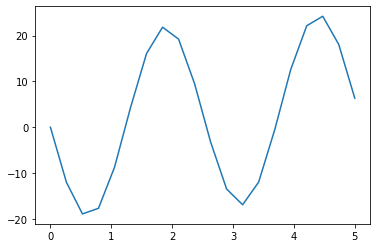

In [5]:
plt.plot(x, fx)
plt.show()

In [6]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

a = 1.6047511032993425
b = 1.5860709333357725


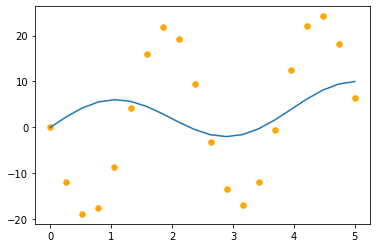

In [43]:
popt, pcov = curve_fit(f, x, fx, p0 = [-0.1, 1], method = 'dogbox', absolute_sigma=True)    

print(f'a = {popt[0]}\nb = {popt[1]}')

plt.scatter(x, fx, s=30, color='orange')
plt.plot(x, f(x, *popt)) 

В общем в задаче аппроксимации меня постиг фэйл - как я не издевался над параметрами - вернул он мне пшик

## Задание 

Продемонстрировать справедливость ЦПТ

В качестве примера возьмем биномиальное распределение 

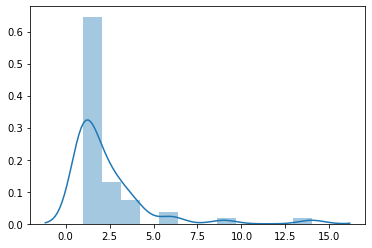

In [56]:
logser_data = logser.rvs(p = 0.7, size = 50)
ax = sns.distplot(logser_data)

In [57]:
mean_list = []
for i in range (0, 1000):
    logser_data = logser.rvs(p = 0.7, size = 50)
    mean_list.append(np.mean(logser_data))

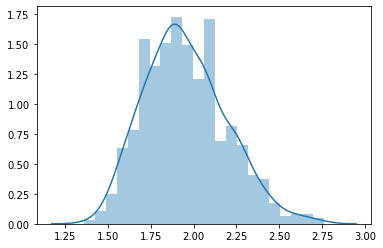

In [58]:
mx = sns.distplot(mean_list)

Собственно, оно, ожидаемо, нормальное, как и велит нам ЦПТ

## Задание 

Найдите собственные значения и собственные векторы матрицы

In [17]:
M = [[1, 4], [1, 1]]
print(M)

[[1, 4], [1, 1]]


In [19]:
wa, va = linalg.eigh(M)
print(f'Собственные значения {wa},\nСобственные векторы\n{va[0]}, {va[1]}')

Собственные значения [0. 2.],
Собственные векторы
[-0.70710678  0.70710678], [0.70710678 0.70710678]


In [5]:
L = sym.var('L')
H = sym.Matrix([[L - 1, -4], [-1, L - 1]])
H.det()

L**2 - 2*L - 3

In [6]:
solution = sym.solve(H.det(), L)
solution

[-1, 3]

In [13]:
E = np.eye(2)

In [20]:
M - solution[0] * E

array([[2.00000000000000, 4],
       [1, 2.00000000000000]], dtype=object)

In [21]:
M - solution[1] * E

array([[-2.00000000000000, 4],
       [1, -2.00000000000000]], dtype=object)

В итоге можно выбрать в качестве собственного вектора для -1 например (4, -2), а для 3 можно взять (2, 1). Чет мне странно, что результаты вычисления руками по теореме Гамильтона-Кэли не очень совпадают с численными расчетами

In [27]:
M = sym.Matrix([[1, 4], [1, 1]])
v1 = sym.Matrix([4, -2])
v2 = sym.Matrix([2, 1])
M * v1

Matrix([
[-4],
[ 2]])

Что равно собственному значению, умноженному на собственный вектор, значит все правильно

In [28]:
M * v2

Matrix([
[6],
[3]])

Тоже все совпадает. В общем численный метод чето странное выдал